In [1]:
import xclim
import xarray as xr
import cftime
import xclim.sdba as sdba

In [2]:
# Define a function to standardize time
def standardize_time(ds):
    """
    Decode and standardize the time variable for a single dataset.
    """
    if 'time' in ds.variables:
        # Get the time attributes
        time_units = ds.time.attrs.get('units', None)
        calendar = ds.time.attrs.get('calendar', 'standard')
        
        # Decode the time variable
        if time_units is not None:
            decoded_times = cftime.num2date(ds.time.values, units=time_units, calendar=calendar)
        
        # Assign back to the dataset
        ds['time'] = ('time', decoded_times)

    return ds

In [3]:
observations = xr.open_dataset('O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\Observation NetCDF\\pr_10km_1989_2019_remapnn_CLIMEX.nc')
model = xr.open_dataset("O:\\Man\\Public\\sharing-4270-CERM\\VLYMI\\Climex DK Domain\\pr\\kba\\pr_EUR-11_CCCma-CanESM2_historical_r1-r1i1p1_OURANOS-CRCM5_kba_1h_1955-2100.nc" , decode_times=False)

In [4]:
observations = observations.rename({"Pr": "pr"})

In [5]:
model = standardize_time(model)

In [6]:
model.time

<xarray.DataArray 'time' (time: 1270194)> Size: 10MB
array([cftime.DatetimeNoLeap(1955, 1, 1, 0, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1955, 1, 1, 1, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1955, 1, 1, 2, 30, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2099, 12, 31, 15, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2099, 12, 31, 16, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2099, 12, 31, 17, 30, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 10MB 1955-01-01 00:30:00 ... 2099-12-31 17:30:00

In [7]:
model["time"] = model.indexes["time"].to_datetimeindex()

C:\Users\mnew\AppData\Local\Temp\ipykernel_30396\3565133336.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  model["time"] = model.indexes["time"].to_datetimeindex()


In [8]:
model = model.sel(time=slice("1981-01-01", "2025-12-31"))

In [9]:
model

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 394200, rlat: 36, rlon: 41, bnds: 2, height: 1)
Coordinates:
  * height        (height) float64 8B 0.0
    lat           (rlat, rlon) float64 12kB ...
    lon           (rlat, rlon) float64 12kB ...
  * rlat          (rlat) float64 288B 3.575 3.685 3.795 ... 7.205 7.315 7.425
  * rlon          (rlon) float64 328B -5.935 -5.825 -5.715 ... -1.645 -1.535
  * time          (time) datetime64[ns] 3MB 1981-01-01T00:30:00 ... 2025-12-3...
Dimensions without coordinates: bnds
Data variables:
    pr            (time, rlat, rlon) float32 2GB ...
    rotated_pole  (time) |S1 394kB ...
    time_bnds     (time, bnds) float64 6MB ...
Attributes: (12/21)
    Conventions:                    CF-1.6 
    contact:                        leduc.martin@ouranos.ca 
    comment:                        CRCM5 v3331 0.11 deg EU11d2 L56 S17-15m C...
    creation_date:                  2016 
    experiment_id:                  kba
    driving_experiment:             CanESM2 historical-r1 r1i1p1 
    ...                             ...
    ouranos_run_id:                 kba OURALIB v1.3 
    product:                        output 
    reference:                      http://www.ouranos.ca 
    acknowlegement:                 This work was financed within the ClimEx ...
    history:                        Wed Jul 13 19:29:32 2016: ncks -O --chunk...
    NCO:                            "4.5.2"

In [10]:
%%time
model_daily= model['pr'].resample(time='1D').sum()

CPU times: total: 1min 54s
Wall time: 11min 1s


In [11]:
del model

In [12]:
model_daily = model_daily*3600

In [13]:
model_daily

<xarray.DataArray 'pr' (time: 16436, rlat: 36, rlon: 41)> Size: 97MB
array([[[4.7420618e-01, 8.0089086e-01, 9.3101990e-01, ...,
         1.4318386e+00, 1.4823396e+00, 1.5112572e+00],
        [5.2743125e-01, 7.4976122e-01, 7.7239239e-01, ...,
         1.2845267e+00, 1.3224548e+00, 1.3291603e+00],
        [5.3602272e-01, 6.6636133e-01, 7.4116981e-01, ...,
         1.1424534e+00, 1.0879710e+00, 1.0959338e+00],
        ...,
        [0.0000000e+00, 2.0954758e-04, 2.0954758e-04, ...,
         1.6135164e-02, 1.9278377e-02, 5.2386895e-03],
        [2.9336661e-03, 0.0000000e+00, 0.0000000e+00, ...,
         2.4307519e-02, 2.1583401e-02, 8.3819032e-03],
        [1.0477379e-03, 0.0000000e+00, 2.0954758e-04, ...,
         2.8288923e-02, 2.5145710e-02, 1.0896474e-02]],

       [[1.4991034e+00, 1.5225728e+00, 1.5569385e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.4944934e+00, 1.4261808e+00, 1.5854369e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.4597085e+00, 1.4207326e+00, 1.6990118e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
        [2.1088867e+00, 2.2369204e+00, 1.6223173e+00, ...,
         8.7046063e-01, 7.3006380e-01, 8.0256724e-01],
        [1.9163126e+00, 2.4072826e+00, 1.8364750e+00, ...,
         1.1564931e+00, 9.9870378e-01, 1.0473188e+00],
        [2.3662112e+00, 2.7419300e+00, 2.6203926e+00, ...,
         2.1792948e+00, 2.0525186e+00, 1.9791769e+00]],

       [[2.2213720e+01, 2.0810589e+01, 1.9999430e+01, ...,
         8.0516558e+00, 7.7388015e+00, 7.6269031e+00],
        [1.7876505e+01, 1.7591728e+01, 1.7226278e+01, ...,
         8.4927540e+00, 8.3932190e+00, 8.4468632e+00],
        [1.7528236e+01, 1.6380545e+01, 1.5324005e+01, ...,
         9.6681061e+00, 9.7144165e+00, 9.1974621e+00],
        ...,
        [9.7219601e+00, 1.0030205e+01, 9.4673595e+00, ...,
         5.4823933e+00, 6.1778817e+00, 7.7978940e+00],
        [6.5670114e+00, 7.6451340e+00, 8.8906851e+00, ...,
         4.8631802e+00, 5.8537116e+00, 6.0492196e+00],
        [4.2586355e+00, 4.8887448e+00, 5.6487741e+00, ...,
         3.5815873e+00, 4.7540059e+00, 5.1014357e+00]]], dtype=float32)
Coordinates:
  * rlat     (rlat) float64 288B 3.575 3.685 3.795 3.905 ... 7.205 7.315 7.425
  * rlon     (rlon) float64 328B -5.935 -5.825 -5.715 ... -1.755 -1.645 -1.535
  * time     (time) datetime64[ns] 131kB 1981-01-01 1981-01-02 ... 2025-12-31
    lat      (rlat, rlon) float64 12kB ...
    lon      (rlat, rlon) float64 12kB ...

In [14]:
mask = xr.where(observations.sel(time='1989-01-02').notnull(), 1, 0)

In [15]:
#Mask data with boolean mask
mask_expanded_model = mask.expand_dims(time=model_daily.time)
model_daily = model_daily.where(mask_expanded_model)

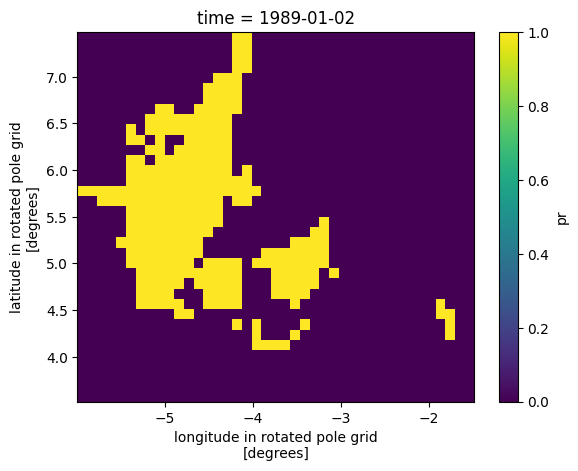

In [16]:
mask.pr.plot()

In [17]:
model_daily

<xarray.Dataset> Size: 388MB
Dimensions:       (time: 16436, rlat: 36, rlon: 41, bnds: 2)
Coordinates:
  * rlat          (rlat) float64 288B 3.575 3.685 3.795 ... 7.205 7.315 7.425
  * rlon          (rlon) float64 328B -5.935 -5.825 -5.715 ... -1.645 -1.535
  * time          (time) datetime64[ns] 131kB 1981-01-01 ... 2025-12-31
    lat           (rlat, rlon) float64 12kB 53.92 53.93 53.95 ... 58.14 58.15
    lon           (rlat, rlon) float64 12kB 7.908 8.092 8.277 ... 14.91 15.12
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, rlat, rlon, bnds) float32 194MB 0.4742 0.4742 ... 5.101
    rotated_pole  (time, rlat, rlon) float32 97MB 0.4742 0.8009 ... 4.754 5.101
    pr            (time, rlat, rlon) float32 97MB nan nan nan ... nan nan nan

In [18]:
model_calib = model_daily.sel(time=slice("1989-01-02", "2019-12-31"))['pr']
obs_calib = observations['pr']
model_bc = model_daily['pr']

In [19]:
model_calib.attrs['units'] = 'mm/day'
obs_calib.attrs['units'] = 'mm/day'
model_bc.attrs['units'] = 'mm/day'

In [20]:
qdm = sdba.QuantileDeltaMapping.train(ref=obs_calib, hist=model_calib, group = 'time')
corrected_qdm = qdm.adjust(model_calib)

C:\Users\mnew\AppData\Roaming\Python\Python310\site-packages\xclim\sdba\utils.py:365: RuntimeWarning: All-nan slice encountered in interp_on_quantiles
  warn(


In [71]:
# Define the ExtremeValues correction method
extremes = sdba.ExtremeValues.train(ref=obs_calib, hist=model_calib,q_thresh=0.95, cluster_thresh = "7.5 mm/day")

# Train the model with the reference (obs_calib) and historical model data (model_calib)
corrected_with_extremes = extremes.adjust(sim =model_calib, scen = corrected_qdm)

C:\Users\mnew\AppData\Roaming\Python\Python310\site-packages\xclim\sdba\utils.py:365: RuntimeWarning: All-nan slice encountered in interp_on_quantiles
  warn(


In [93]:
#Adjust wet day / dry day frequency

corrected_qq_extr_wddd= sdba.processing.adapt_freq(ref = obs_calib, sim= corrected_with_extremes , thresh= '0.1 mm/day' , group ='time')

In [97]:
corrected_with_extremes.values[corrected_with_extremes.values <= 0.1] = 0

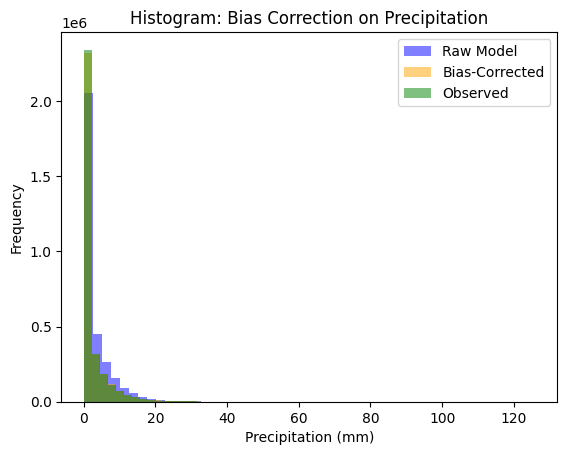

In [98]:
import matplotlib.pyplot as plt

plt.hist(model_calib.values.flatten(), bins=50, alpha=0.5, label="Raw Model", color="blue")
plt.hist(corrected_with_extremes.values.flatten(), bins=50, alpha=0.5, label="Bias-Corrected", color="orange")
plt.hist(obs_calib.values.flatten(), bins=50, alpha=0.5, label="Observed", color="green")

plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram: Bias Correction on Precipitation")
plt.show()


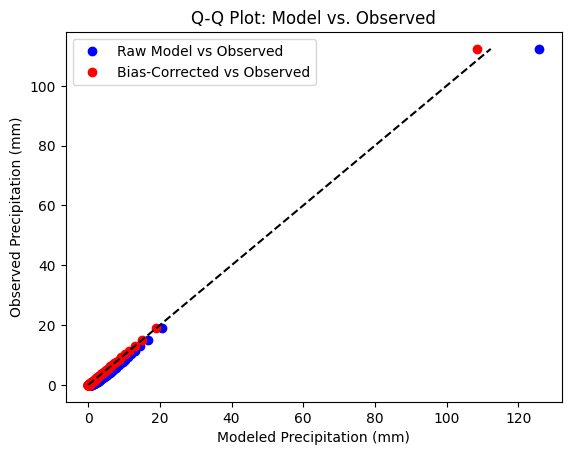

In [99]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Flatten DataArrays to 1D NumPy arrays
model_q = np.nanquantile(model_calib.values.flatten(), np.linspace(0, 1, 100))
corrected_q = np.nanquantile(corrected_with_extremes.values.flatten(), np.linspace(0, 1, 100))
obs_q = np.nanquantile(obs_calib.values.flatten(), np.linspace(0, 1, 100))

# Plot Q-Q comparison
plt.plot(model_q, obs_q, "bo", label="Raw Model vs Observed")
plt.plot(corrected_q, obs_q, "ro", label="Bias-Corrected vs Observed")
plt.plot([min(obs_q), max(obs_q)], [min(obs_q), max(obs_q)], "k--")  # 1:1 line

plt.xlabel("Modeled Precipitation (mm)")
plt.ylabel("Observed Precipitation (mm)")
plt.legend()
plt.title("Q-Q Plot: Model vs. Observed")
plt.show()

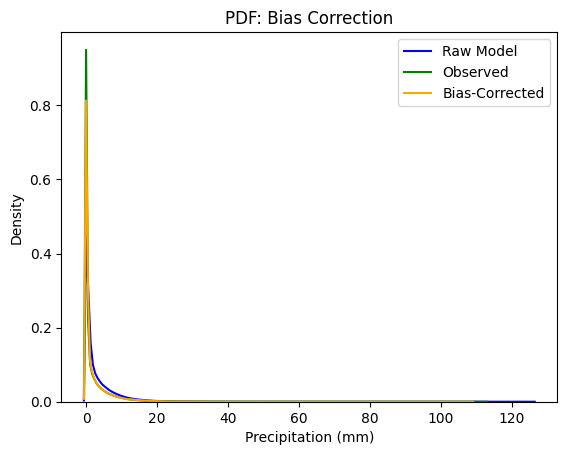

In [100]:
import seaborn as sns

sns.kdeplot(model_calib.values.flatten(), label="Raw Model", color="blue")
sns.kdeplot(obs_calib.values.flatten(), label="Observed", color="green")
sns.kdeplot(corrected_with_extremes.values.flatten(), label="Bias-Corrected", color="orange")

plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.legend()
plt.title("PDF: Bias Correction")
plt.show()